In [3]:
# What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
file = "amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df['price'].isnull().any()

False

In [7]:
#Frequency Tables:

#Generate a frequency table for the product category.
#Which are the top 5 most listed product categories?

frequency = df['category'].value_counts()
top_5 = frequency.head(5)
top_5


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category'>

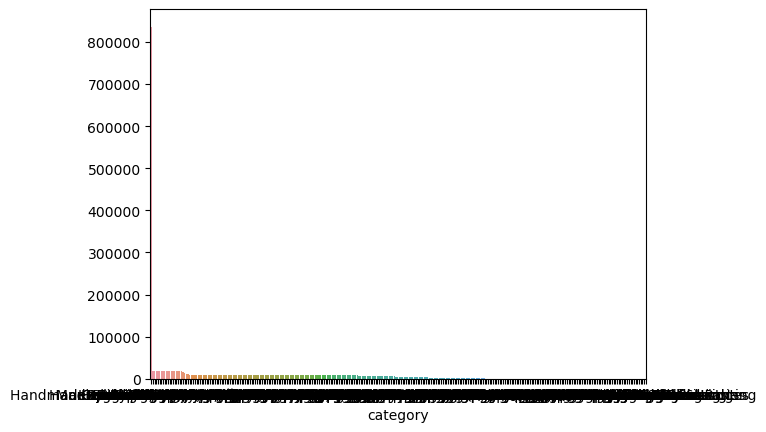

In [8]:
sns.barplot(x=frequency.index, y=frequency.values)

In [ ]:
Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If it's hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [19]:
#Calculate the mean, median, and mode for the price of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df ['price'].mode()[0]
quantiles_price = df['price'].quantile([0.25, 0.50, 0.75])

mean_price, median_price, mode_price, quantiles_price

(89.24380943923663,
 19.09,
 9.99,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [20]:
#Determine the variance, standard deviation, range, and interquartile range for product price

variance_price = df ['price'].var()
std_dev_price = df ['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

variance_price, std_dev_price, min_price, max_price, range_price

(119445.48532256528, 345.60886175352226, 0.0, 100000.0, 100000.0)

C:\Users\mross\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


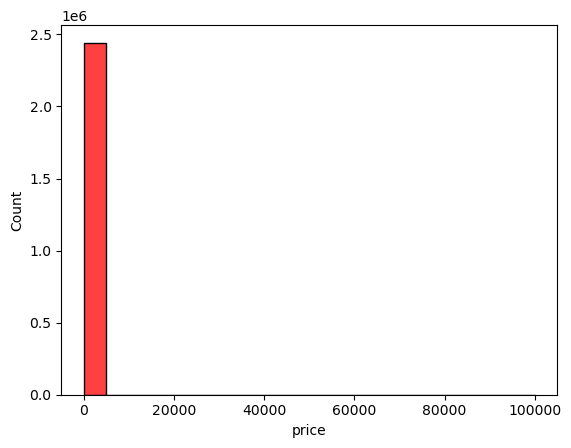

In [14]:
#histogram

sns.histplot(df['price'], bins=20, color="red");


In [ ]:
Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?



In [15]:
#Calculate the mean, median, and mode for the rating of products.

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

In [16]:
df['stars'].isnull().any()

False

In [17]:
#Determine the variance, standard deviation, and interquartile range for product rating
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
quantiles_rating = df['stars'].quantile ([0.25, 0.50, 0.75])

variance_rating, std_dev_rating, quantiles_rating

(4.81743402976196,
 2.1948653785054697,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [21]:
#Calculate the skewness and kurtosis for the rating column
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

C:\Users\mross\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


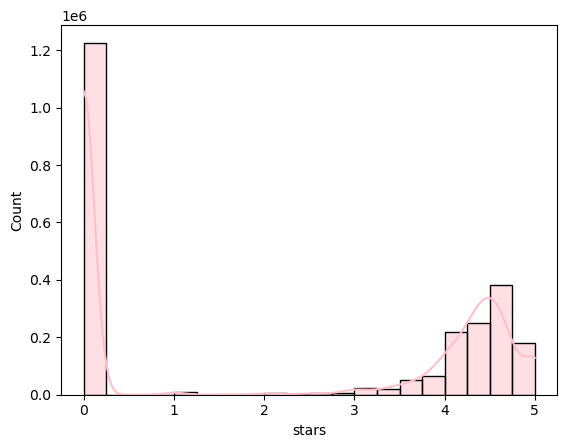

In [22]:
#Plot a histogram to visualize the distribution of product ratings

sns.histplot(df['stars'], kde=True, bins = 20, color="pink");